<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='Figures/alinco.png' width="120"/>
<h1 style="color:#000047;">Tarea 3: Algoritmos de detección de Outliers Multivariados</h1>
<br style="clear:both"/>
</div>


<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Investigar y entender algunos de los algoritmos que se usan para detección de outliers.
</div>

<div style="border-left:6px solid #003366; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#003366; margin-top:0;">1. Local Outlier Factor (LOF) <span style='font-size:0.8em; color:#888;'>&#128200;</span></h3>
<p style="font-size:1.08em;">
El <b>Local Outlier Factor (LOF)</b> es un algoritmo no supervisado que detecta anomalías comparando la densidad local de cada punto con la de sus vecinos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.
</p>
<ul style="font-size:1.05em;">
<li>Consulta el artículo original: <a href="https://dl.acm.org/doi/pdf/10.1145/335191.335388" target="_blank">LOF paper</a></li>
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo LOF y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo LOF de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Presenta tus resultados con gráficos y tablas para facilitar la comparación.
</div>
</div>

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class LOF:
    def __init__(self, k=20):
        self.k = k

    def fit(self, X):
        self.X = X
        self.n = X.shape[0]
        
        self.dist_matrix = np.sqrt(((X[:, None, :] - X[None, :, :]) ** 2).sum(axis=2))

        self.neighbors_idx = np.argsort(self.dist_matrix, axis=1)[:, 1:self.k+1]

        self.k_distance = np.sort(self.dist_matrix, axis=1)[:, self.k]

        self.reach_dist = np.zeros((self.n, self.k))

        for i in range(self.n):
            for j_idx, neighbor in enumerate(self.neighbors_idx[i]):
                self.reach_dist[i, j_idx] = max(self.k_distance[neighbor],
                                                self.dist_matrix[i, neighbor])

        self.lrd = self.k / self.reach_dist.sum(axis=1)

        self.lof_scores = np.zeros(self.n)
        for i in range(self.n):
            neighbors = self.neighbors_idx[i]
            self.lof_scores[i] = (self.lrd[neighbors] / self.lrd[i]).mean()

        return self

    def fit_predict(self, X):
        self.fit(X)
        return self.lof_scores


In [12]:
# Cargar dataset
df = pd.read_csv("data/insurance.csv")

# Usar solo columnas numéricas
df_num = df.select_dtypes(include=[np.number])

# Escalar datos
scaler = StandardScaler()
X = scaler.fit_transform(df_num)

# Aplicar LOF manual
lof = LOF(k=20)
scores_lof = lof.fit_predict(X)

df["LOF_manual"] = scores_lof

df.head()


,age,sex,bmi,children,smoker,region,charges,LOF_manual
0,19,female,27.900,0,yes,southwest,16884.92400,1.010176
1,18,male,33.770,1,no,southeast,1725.55230,1.520771
2,28,male,33.000,3,no,southeast,4449.46200,1.011691
3,33,male,22.705,0,no,northwest,21984.47061,1.034799
4,32,male,28.880,0,no,northwest,3866.85520,0.995231


In [13]:
from sklearn.neighbors import LocalOutlierFactor

lof_sklearn = LocalOutlierFactor(n_neighbors=20, novelty=False)
scores_sklearn = -lof_sklearn.fit_predict(X)  # -1=outlier, 1=inlier
lof_vals = lof_sklearn.negative_outlier_factor_  # valores reales de LOF

df["LOF_sklearn"] = -lof_vals 

df[["LOF_manual", "LOF_sklearn"]].head()


,LOF_manual,LOF_sklearn
0,1.010176,1.010176
1,1.520771,1.520771
2,1.011691,1.011691
3,1.034799,1.034799
4,0.995231,0.995231


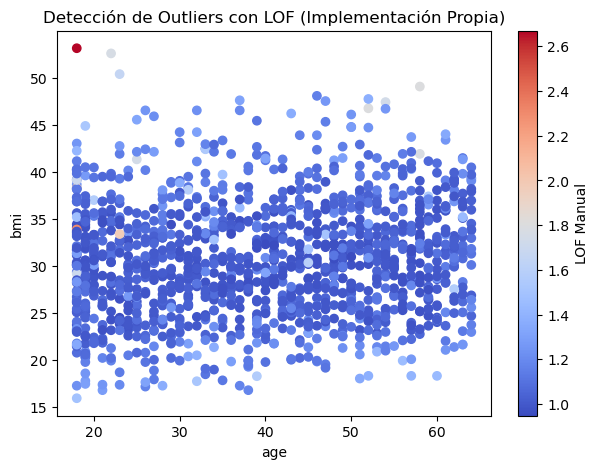

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df_num.iloc[:,0], df_num.iloc[:,1], c=df["LOF_manual"], cmap="coolwarm")
plt.colorbar(label="LOF Manual")
plt.title("Detección de Outliers con LOF (Implementación Propia)")
plt.xlabel(df_num.columns[0])
plt.ylabel(df_num.columns[1])
plt.show()


<div style="border-left:6px solid #b36b00; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#b36b00; margin-top:0;">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <span style='font-size:0.8em; color:#888;'>&#128201;</span></h3>
<p style="font-size:1.08em;">
<b>DBSCAN</b> es un algoritmo de clustering basado en densidad que agrupa puntos cercanos y considera como outliers (ruido) aquellos que no pertenecen a ningún grupo. A diferencia de K-means, no requiere especificar el número de clusters previamente.
</p>
<ul style="font-size:1.05em;">
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo DBSCAN y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo DBSCAN de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#fffbe6; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Explica brevemente las diferencias entre los resultados obtenidos por tu clase y los de <code>sklearn</code>.
</div>
</div>

In [15]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.X = X
        self.n = len(X)
        self.labels = np.full(self.n, -1)  # -1 = ruido/outlier
        self.visited = np.zeros(self.n, dtype=bool)

        self.dist_matrix = np.sqrt(((X[:, None, :] - X[None, :, :]) ** 2).sum(axis=2))

        cluster_id = 0
        for i in range(self.n):
            if not self.visited[i]:
                self.visited[i] = True
                neighbors = self.region_query(i)

                if len(neighbors) < self.min_samples:
                    self.labels[i] = -1
                else:
                    self.expand_cluster(i, neighbors, cluster_id)
                    cluster_id += 1

        return self

    def region_query(self, point_idx):
        return np.where(self.dist_matrix[point_idx] <= self.eps)[0]

    def expand_cluster(self, point_idx, neighbors, cluster_id):
        self.labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n = neighbors[i]
            if not self.visited[n]:
                self.visited[n] = True
                new_neighbors = self.region_query(n)
                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            if self.labels[n] == -1:
                self.labels[n] = cluster_id
            i += 1


In [16]:
db = DBSCAN(eps=0.7, min_samples=10)
db.fit(X)

df["DBSCAN_manual"] = db.labels
df.head()


,age,sex,bmi,children,smoker,region,charges,LOF_manual,LOF_sklearn,DBSCAN_manual
0,19,female,27.900,0,yes,southwest,16884.92400,1.010176,1.010176,0
1,18,male,33.770,1,no,southeast,1725.55230,1.520771,1.520771,1
2,28,male,33.000,3,no,southeast,4449.46200,1.011691,1.011691,2
3,33,male,22.705,0,no,northwest,21984.47061,1.034799,1.034799,0
4,32,male,28.880,0,no,northwest,3866.85520,0.995231,0.995231,0


In [17]:
from sklearn.cluster import DBSCAN as DBSCAN_SK

db2 = DBSCAN_SK(eps=0.7, min_samples=10)
labels2 = db2.fit_predict(X)

df["DBSCAN_sklearn"] = labels2
df[["DBSCAN_manual", "DBSCAN_sklearn"]].head()


,DBSCAN_manual,DBSCAN_sklearn
0,0,0
1,1,1
2,2,2
3,0,0
4,0,0


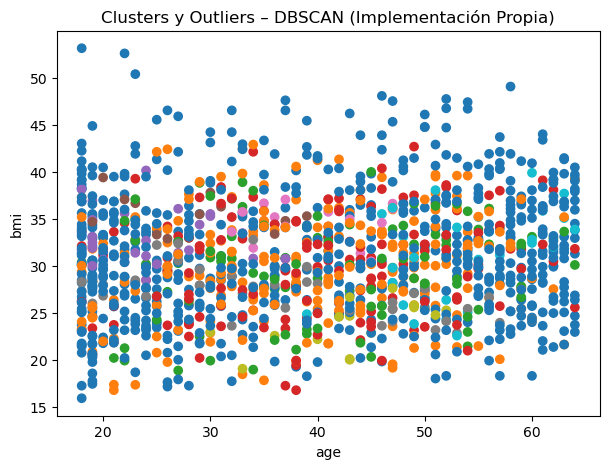

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df_num.iloc[:,0], df_num.iloc[:,1], c=df["DBSCAN_manual"], cmap="tab10")
plt.title("Clusters y Outliers – DBSCAN (Implementación Propia)")
plt.xlabel(df_num.columns[0])
plt.ylabel(df_num.columns[1])
plt.show()